<a href="https://colab.research.google.com/github/Yesi0/analisis-de-experimentos/blob/main/analisis_de_experimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análisis de experimentos
</h1>


# <font color='red' style='font-size: 30px;'> Introducción al análisis de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Insertando el experimento en un Dataframe </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando las bibliotecas

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Pruebas realizadas en forma normalizada</b></font></p>








<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construyendo una matriz representando todas las pruebas realizadas:


In [3]:
#Matriz para analisis factorial
pruebas = np.array([ [-1,-1],[1,-1],[-1,1],[1,1] ]) #4 experimentos de analisis factorial
pruebas

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

### pyDOE2

https://pypi.org/project/pyDOE2/

In [4]:
!pip install pyDOE2
import pyDOE2 as doe #biblioteca que ayuda a genera matrices factoriales

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25521 sha256=7e7abb8d886518aa9de6949533730d5b93185e37225a2b3d36fd0ba8862c12db
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built pyDOE2


## Construyendo un diseño factorial de 2²


In [5]:
pruebas = doe.ff2n(2) #utilizamos doe, para factorial de 2 niveles (2n=limite superior e inferio) elevado a 2 (2), que son las 2 variables a analizar (leche y harina)

In [6]:
pruebas

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Insertando el diseño en un Dataframe

In [7]:
experimento = pd.DataFrame(pruebas, columns = ['Harina','Leche']) #convirtiendo el array pruebas en un dataFrame

In [8]:
experimento

,Harina,Leche
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Insertando la columna con los resultados

In [9]:
experimento['Cantidades'] = [19,37,24,49]

In [10]:
experimento

,Harina,Leche,Cantidades
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusión:</b> Finalmente tenemos nuestro experimento representado por un <i>Dataframe</i> de Pandas. Usaremos este <i>Dataframe</i> para comenzar el análisis de nuestro experimento.
<hr>   

# <font color = 'purple'> Analizando gráficamente el experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando Seaborn

https://seaborn.pydata.org

In [11]:
import seaborn as sns

In [12]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('rocket_r')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para la Harina

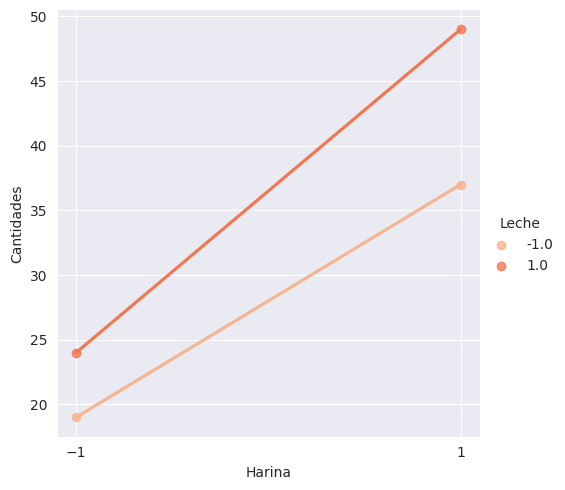

In [13]:
ax1 = sns.lmplot(data=experimento, x='Harina', y='Cantidades', ci=None, hue='Leche') #recordar que hue es para agregar otra variable al grafico
ax1.set(xticks=(-1,1)) #modificamos los valores de los ticks de el eje X para mostrar

Interpretacion grafico: En este caso podemos ver que la harina si influye de alguna forma sobre la leche.
Las rectas tienen una mayor inclunacion, lo que indica que la harina tiene un valor mucho mas grande que la leche, si se quieren hacer mas cantidades

### Para la Leche

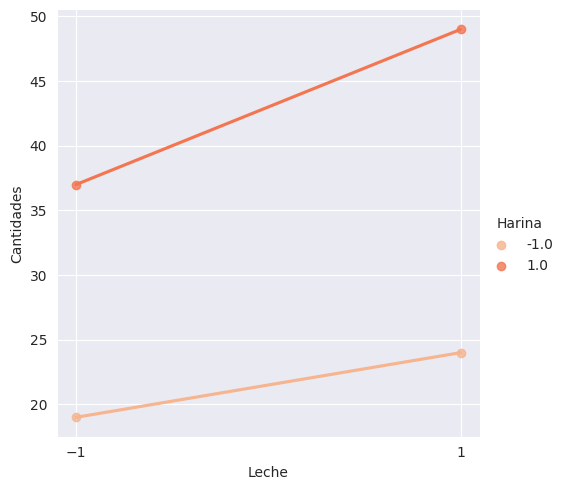

In [14]:
ax2 = sns.lmplot(data=experimento, x='Leche', y='Cantidades', ci=None, hue='Harina')
ax2.set(xticks=(-1,1))

La leche tambien influye en el valor de la harina, esto lo podemos saber porque las rectas tienen un angulo (no estan de forma horizontal)

# <font color = 'purple'> Ajustando el modelo estadístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

### Bibliotecas  Stats Model


In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### .

In [16]:
#Diseñando modelo estadistico
modelo = smf.ols(data = experimento, formula='Cantidades ~ Harina + Leche + Harina:Leche') #Esta es la formula del modelo estadistico 'simplificada' ya que los beta y el error los va a genera la biblioteca statsmodels. el signo ~ significa igual y los 2 puntos : harina:leche es una multiplicacion


In [17]:
modelo_ajustado = modelo.fit()

In [18]:
print(modelo_ajustado.summary()) #summary = resumen

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                nan
Time:                        20:35:18   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.2500        nan        nan   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:956: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw =

los resultados que nos interesa son:

                   coef    std err        

Intercept       32.2500        nan       
Harina          10.7500        nan        
Leche            4.2500        nan        
Harina:Leche     1.7500        nan  

Donde podemos ver, que la harina es mas importante que la leche, porque tiene un coeficiente mayor.
y en los 4 experimientos que se hicierons no hubo errores (err nan)

# <font color = 'purple'> Aumentando los Grados de libertad  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Réplicas en el centro</b>

<p style='margin: 30px 30px;'>
    
    

    

    
<hr>    

In [19]:
centro = np.array([
                  [0,0,29],
                  [0,0,30],
                  [0,0,29],
                  [0,0,30],
                ])

In [20]:
centro_dataframe = pd.DataFrame(centro, columns = ['Harina','Leche','Cantidades'], index=[4,5,6,7])

In [21]:
centro_dataframe

,Harina,Leche,Cantidades
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [22]:
#ahora juntamos los 2 dataFrame
experimento = experimento.append(centro_dataframe)

<ipython-input-22-f4cef7adaa4c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  experimento = experimento.append(centro_dataframe)


In [23]:
experimento

,Harina,Leche,Cantidades
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análisis de significancia estadística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [24]:
modelo = smf.ols(data = experimento, formula='Cantidades ~ Harina + Leche + Harina:Leche')

In [25]:
modelo_ajustado = modelo.fit()

In [26]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Sun, 29 Oct 2023   Prob (F-statistic):            0.00152
Time:                        20:35:19   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.8750      0.710     43.494   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


como podemos ver, ahora hay varios parametros que antes aparecian con nan, eso debido a que anteriormente teniamos un grado de libertar igual a la cantidad de parametros (4) lo que nos daba un residuo = 0, y con un residuo = 0 no podemoshacer el analissi estadisticos, por tal motivo agregamos mas experimentos dandonos un residio de 4 (df residual).

Para iniciar el analisis veremos al parametro P>t = que significa, es la probabilidad que la hipotesis es distinta de 0 (significante) o igual a 0 (no significante)

t, es la cantidqad de diferencia de errores, es decir, mientras mas grande el valor de t, mayor es la evidencia en contra de la hipotesis nula (la hipotesis nula es igual a 0 ), es decir mientras mayor sea t, mas significante es la variable, por lo que mientras mayor, mejor para que sea una variable significante

## Evaluacion de significacion
No significante = p>t > 5% (alfa)

Significante = p>t < 5%(alfa)

Notar que el valor de alfa 5% es un valor de conveniencia (estandar) para el analisis.

Segun los resultados y reemplazando los valores de arriba, tenemos que el interceptor, harina y leche son significantes porque su probabilidad es menor al 5%, y la interaccion de la harina con la leche sobrepasa el 5%, por lo que no es significante y se podria excluirla de la ecuacion y no va afectar el resultado.


# <font color = 'purple'> Prueba de significación estadística usando <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





In [27]:
# t calculado
t_valores = modelo_ajustado.tvalues

In [28]:
t_valores

Intercept       43.494275
Harina          10.708252
Leche            4.233495
Harina:Leche     1.743204
dtype: float64

In [29]:
#conviertiendo los indices del resultado de arriba, en listas
nombre = t_valores.index.tolist()

In [30]:
nombre

['Intercept', 'Harina', 'Leche', 'Harina:Leche']

### .

In [31]:
# calculatno t tabulado
from scipy import stats

### .


In [32]:
distribucion = stats.t(df = 4)  # df = 4 son los grados residuales que calculamos mas arriba, Df Residuals

In [33]:
distribucion.ppf(q = 1 - 0.025) # q es la diferencia del total (100% o 1) de la distribucion menos el valor superior de t tabulado, t tabulado es la proporcion del 5% de alfa, que definimos anterioremnte, por lo que la mitad del 5% es 2.5% que va en ambos extremos del grafico, y aqui consideramos solo un 2.5%


2.7764451051977987

In [34]:
limite = [distribucion.ppf(q = 1 - 0.025)]*len(nombre)

In [35]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando el gráfico

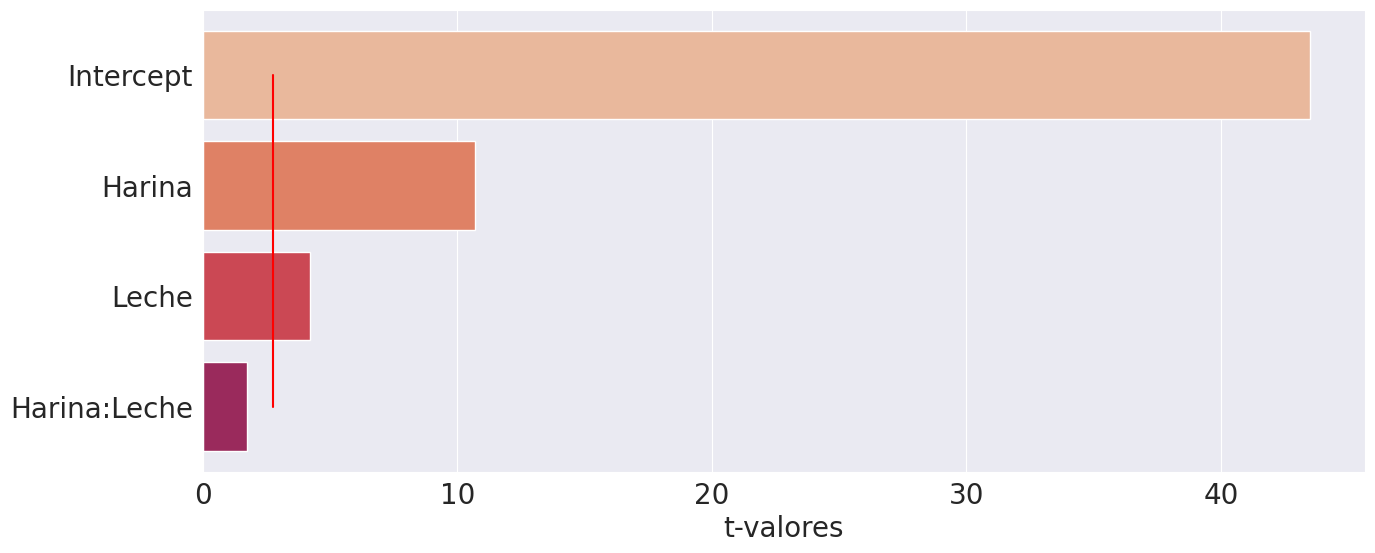

In [36]:
# Graficando los t calculados (t_valores), para hacer posteriormente el diagrama de pareto
pareto = sns.barplot(x=t_valores, y = nombre)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
pareto.plot(limite, nombre, 'r')

t calculado, son nuestras 4 barras

t tabulado, es la linea vertical verde

si t calculado > a t tabulado = significante
si t calculado < a t tabulado = no significante

# <font color = 'purple'> Proponiendo un nuevo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [37]:
modelo_2 = smf.ols(data = experimento, formula='Cantidades ~ Harina + Leche')

In [38]:
modelo_ajustado_2 = modelo_2.fit()

In [39]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           0.000571
Time:                        20:35:19   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr>

# <font color = 'purple'> Diagrama de Pareto estandarizado del nuevo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [40]:
#Nuevo t calculado
t_valores = modelo_ajustado_2.tvalues

In [41]:
t_valores

Intercept    36.658022
Harina        9.025173
Leche         3.568092
dtype: float64

In [42]:
nombre = t_valores.index.tolist()

In [43]:
nombre

['Intercept', 'Harina', 'Leche']

### .

In [44]:
distribucion = stats.t(df = 5)

In [45]:
distribucion.ppf(q = 1 - 0.025)

2.5705818366147395

In [46]:
limite = [distribucion.ppf(q = 1 - 0.025)]*len(nombre)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando el gráfico

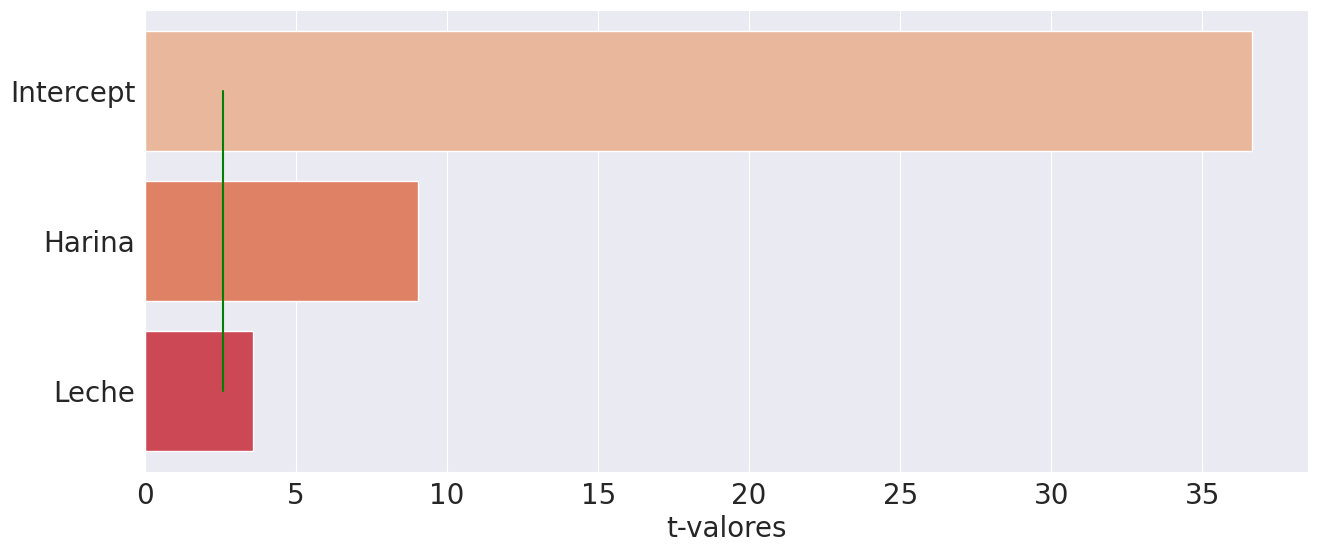

In [47]:
pareto = sns.barplot(x=t_valores, y = nombre)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)
pareto.plot(limite, nombre, 'green')

<font color='red' style='font-size: 30px;'> Predichos por observados  </font>
<hr style='border: 2px solid red;'>

In [48]:
observados = experimento['Cantidades']

In [49]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Cantidades, dtype: int64

### .

In [50]:
predichos = modelo_ajustado_2.predict()

In [51]:
predichos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [52]:
import matplotlib.pyplot as plt

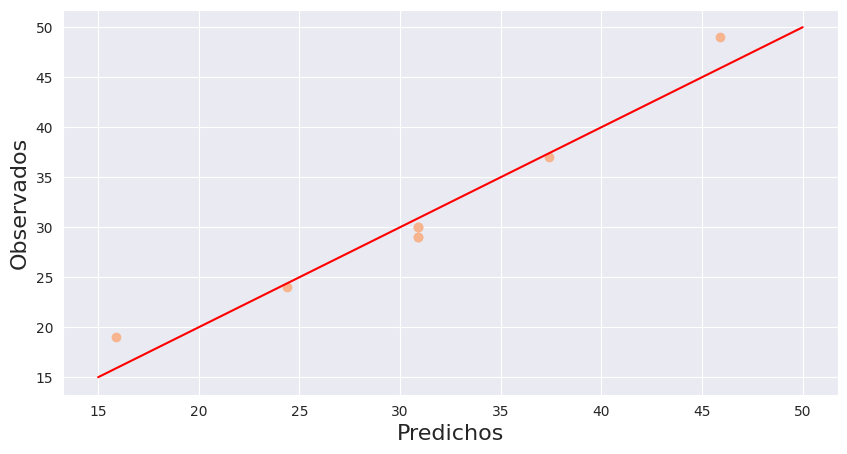

In [53]:
plt.figure(figsize = (10,5))
plt.xlabel('Predichos', fontsize=16)
plt.ylabel('Observados', fontsize=16)

#línea de guía
x = np.linspace(start=15, stop=50, num=10) #la recta va desde los intervalos 15 al 50, para asemejar a las cantidades que fueron hechas (19 hasta 30), 10 es la cantidad de puntos
y = np.linspace(start=15, stop=50, num=10)
plt.plot(x,y,'r')

#comparación
plt.scatter(predichos, observados)

LA recta verde indica el momento en que los cupcake observados (que se realizaron en la realidad) y los predichos (lo que calculamos con el modelo) son iguales.

Los puntos estan muy cerca de la recta, es decir, esta muy cerca al mundo real, significa que el modelo esta funcionando bien, esta siendo validado, por lo que podemos usarlo para genera valores con datos que no hemos obtenido para simular.

<hr>

In [54]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           0.000571
Time:                        20:35:21   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


R-squared indica que tan bueno o ajustado esta el modelo, mientras mas cercano a 1 mejor, en este caso tenemos 0.95, por lo que el modelo se ajusta muy bien a los datos que estamos observando en nuestro experimento

### .

# <font color = 'purple'> Explorando el modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [55]:
parametros = modelo_ajustado_2.params

In [56]:
parametros

Intercept    30.875
Harina       10.750
Leche         4.250
dtype: float64

### .

### Definiendo la función

In [57]:
def modelo_receta(x_h, x_l):
  #limite  valores entre -1 y 1
  limite_normalizado = [-1,+1]
  limite_harina = [0.5, 1.5]
  limite_leche = [0.2, 0.7]

  #Convertir los numeros que va ingresar el usuario (valores limite da variables harina y leche) a valores normalizados (limite normalizado)
  x_h_convertido = np.interp(x_h, limite_harina, limite_normalizado)
  x_l_convertido = np.interp(x_l, limite_leche, limite_normalizado)

  cantidades = parametros['Intercept'] + parametros['Harina']*x_h_convertido + parametros['Leche']*x_l_convertido #esta es la ecuacion realizada anteriormente, donde *x_l_convertido es nuestro beta correspondien a la cantidad en gr o kg de vada variable
  return round(cantidades)

In [58]:
modelo_receta(1.0, 0.5)

32

# <font color = 'purple'> Mapa de colores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [59]:
x_harina = np.linspace(start=0.5, stop=1.5, num=10)
x_harina

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [60]:
x_leche = np.linspace(start=0.2, stop=0.7, num=10)
x_leche

array([0.2       , 0.25555556, 0.31111111, 0.36666667, 0.42222222,
       0.47777778, 0.53333333, 0.58888889, 0.64444444, 0.7       ])

### .

In [61]:
puntos = []
for cont1 in x_harina:
  temp=[]
  for cont2 in x_leche:
    temp.append(modelo_receta(cont1,cont2))
  puntos.append(temp)

In [62]:
puntos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construyendo la superficie de respuesta

In [63]:
#Esta libreria nos ayuda a generar mapa de colores
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

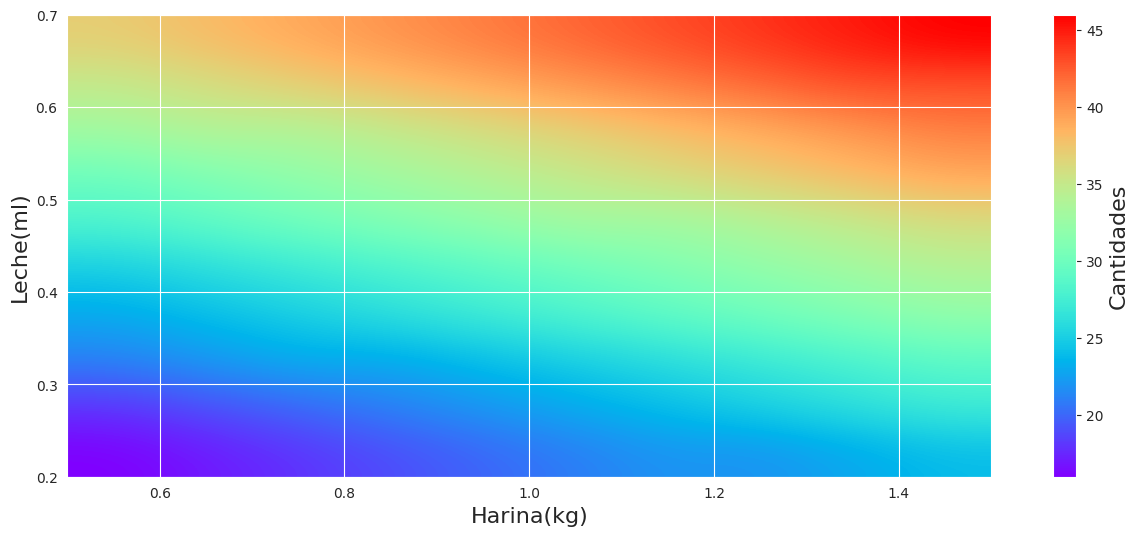

In [64]:
#base
plt.figure(figsize=(16,6))
plt.xlabel('Harina(kg)', fontsize=16)
plt.ylabel('Leche(ml)', fontsize=16)

#Mapa de colores
mapa_color = plt.imshow(puntos, origin='lower', cmap=cm.rainbow, interpolation='quadric', extent=(0.5,1.5,0.2,0.7))

#Barra de color
plt.colorbar().set_label('Cantidades', fontsize=16)

<a list of 7 text.Text objects>

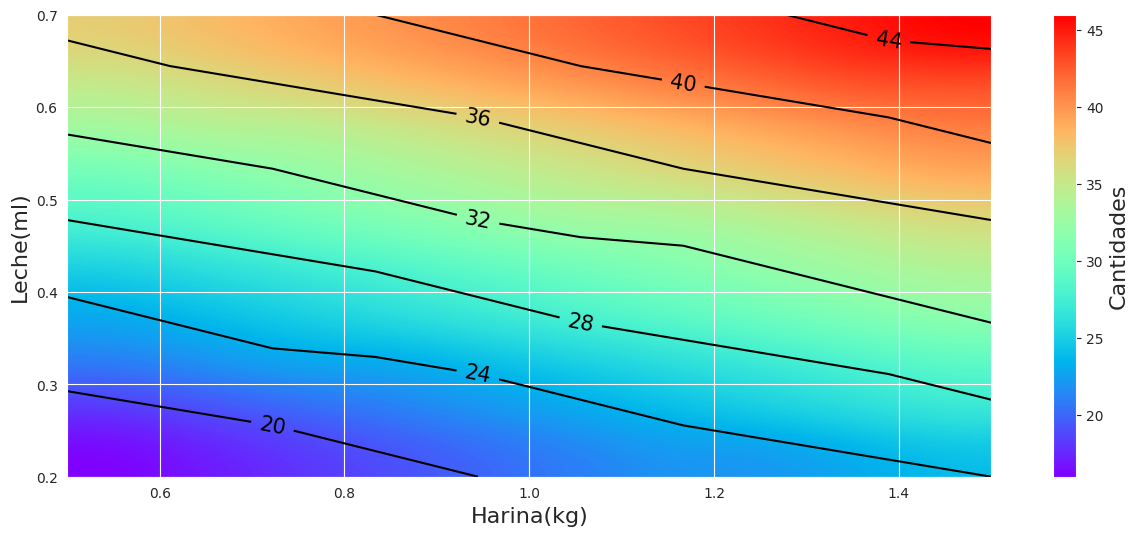

In [65]:
#base
plt.figure(figsize=(16,6))
plt.xlabel('Harina(kg)', fontsize=16)
plt.ylabel('Leche(ml)', fontsize=16)

#Mapa de colores
mapa_color = plt.imshow(puntos, origin='lower', cmap=cm.rainbow, interpolation='quadric', extent=(0.5,1.5,0.2,0.7))

#Barra de color
plt.colorbar().set_label('Cantidades', fontsize=16)

#linea
lineas = plt.contour(x_harina, x_leche, puntos, colors='k', linewidths = 1.5)

plt.clabel(lineas, inline=True, fmt = '%1.0f', fontsize=15, inline_spacing = 10)